# LLMs behind the api key

### ChatGPT

ChatGPT is a LLM (large language model) developed by OpenAI, built on the GPT (Generative Pre-trained Transformer) architecture. It’s designed to generate human-like responses to text input, making it versatile for a range of tasks like answering questions, providing recommendations, and even engaging in casual conversation. By leveraging extensive training on diverse datasets, ChatGPT can generate coherent and contextually relevant replies based on the input it receives.

In the screenshot, we see an example of how users interact with ChatGPT by asking it a question, and in return, it generates a response by drawing on its pre-trained knowledge.



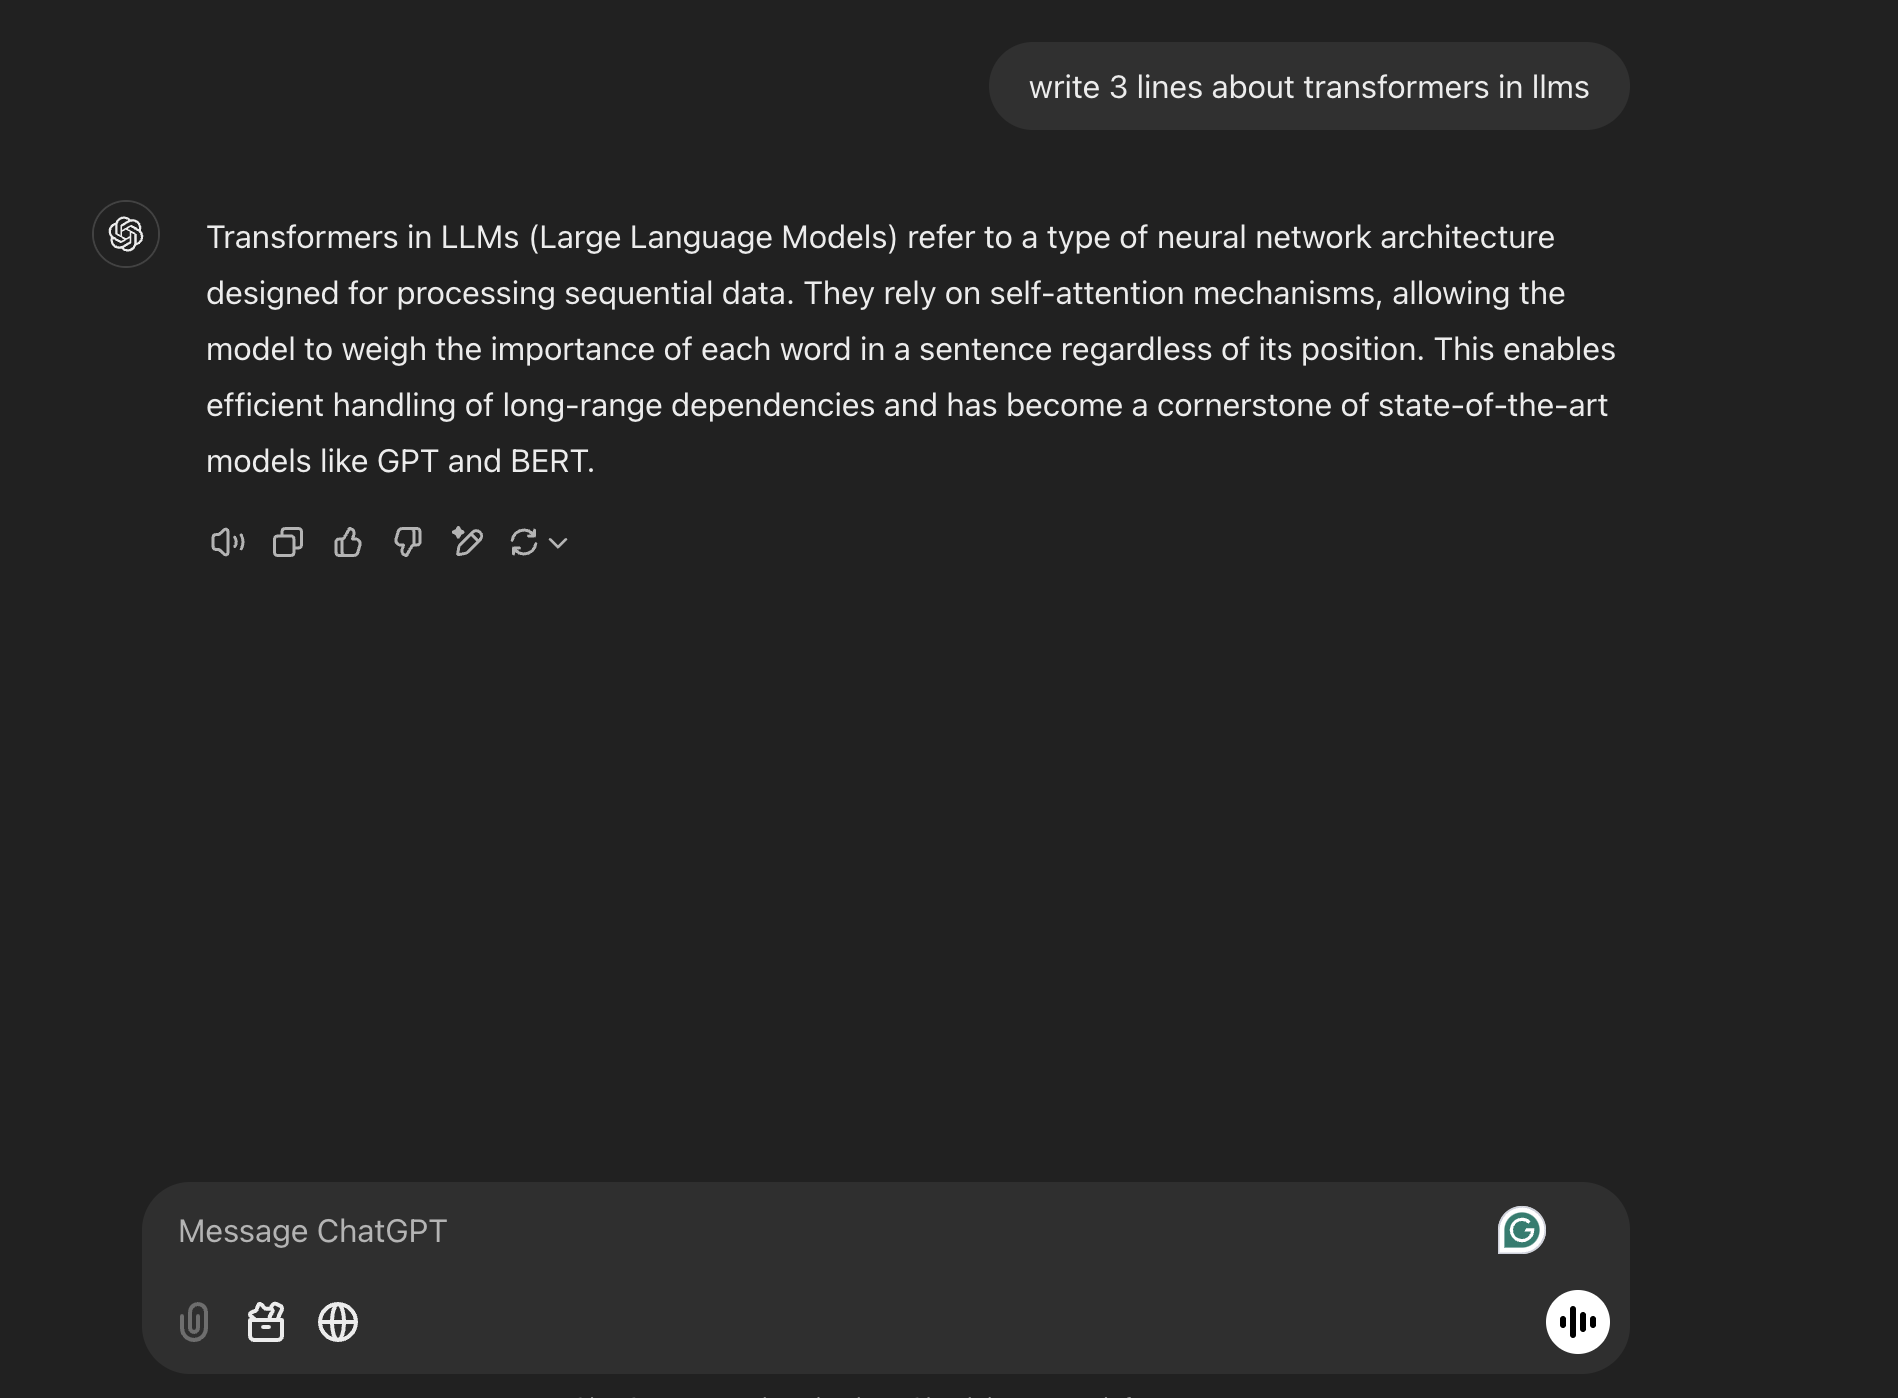

In [1]:
from IPython.display import Image

# Display the image
Image(filename='/kaggle/input/chatgpt-image/Screenshot 2025-01-19 at 12.45.02AM.png')


# From ChatGPT to the Hugging Face Pipeline: The Inner Workings



While ChatGPT provides an easy-to-use interface for interacting with a language model, there’s a lot happening behind the scenes. To understand how the magic works, let’s dive deeper into how large language models (LLMs) are deployed using frameworks like Hugging Face’s transformers library.

**Huugging Face** : is an open-source platform and community for Natural Language Processing (NLP), offering a vast collection of pre-trained models and tools to streamline AI development. Its `transformers` library provides easy access to cutting-edge large language models like GPT, BERT, and LLaMA for a variety of tasks such as text generation, classification, and translation.

#### Using the Meta LLaMA Instruct Model with Hugging Face’s Text Generation Pipeline

To replicate the internal workings of ChatGPT, we can use a model like Meta's LLaMA (Large Language Model Meta AI), particularly the LLaMA Instruct model for instruction-based generation tasks. This model is fine-tuned to handle various conversational and instruction-following tasks, similar to ChatGPT.

Loading Meta LLaMA Instruct 3.2 1B Model in Hugging Face’s Text Generation Pipeline

Now, let’s see how we can load Meta's LLaMA Instruct 3.2 1B model using Hugging Face’s text-generation pipeline. This model is fine-tuned to follow instructions, which makes it perfect for tasks like answering questions or generating text based on user prompts.




In [2]:
from huggingface_hub import login
# Replace 'your_access_token' with your actual Hugging Face token
login("hugging face token here")

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [3]:
import torch
from transformers import pipeline

model_id = "meta-llama/Llama-3.2-1B-Instruct"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device = 0
)


config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [4]:
messages = [
    {"role": "system", "content": "You are an intelligent assistant trained to follow user instructions and provide accurate, concise, and helpful responses."},
    {"role": "user", "content": "write 3 lines about transfromers in llms"},
]

outputs = pipe(
    messages,
    max_new_tokens=256,
)
print(outputs[0]["generated_text"][-1]['content'])

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Here are three lines about transformers in LLMs (Large Language Models):

Transformers in LLMs are a type of neural network architecture that enables efficient and effective natural language processing tasks, such as text classification, sentiment analysis, and machine translation. These models consist of multiple layers of self-attention mechanisms, enabling them to process sequential data in parallel and learn complex patterns. By leveraging the strengths of transformers, LLMs have become a popular choice for a wide range of applications, including language translation, question answering, and text summarization.


### **Behind the Pipeline: How It Works**

1. **Define the Chat Template**  
   A structured message format is prepared with roles like system and user. This ensures the model follows the conversation context..

2. **Tokenization**  
   The input text is broken into smaller units called tokens (e.g., words, subwords, or characters). This is necessary for the model to process text effectively.

3. **Model Processing**  
   The tokens are fed into the LLaMA model, which uses its pre-trained knowledge and a **transformer architecture** with **self-attention** to understand the context and relationships between tokens.

4. **Text Generation**  
   The model predicts the next tokens iteratively, using **sampling techniques** like top-k and top-p to ensure coherent and diverse outputs.

5. **Detokenization**  
   The generated tokens are converted back into readable text to form the final response.

In [5]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
model_id = "meta-llama/Llama-3.2-1B-Instruct"

model = AutoModelForCausalLM.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)
model.to('cuda')

messages = [
    {"role": "system", "content": "You are an intelligent assistant trained to follow user instructions and provide accurate, concise, and helpful responses."},
    {"role": "user", "content": "write 3 lines about transfromers in llms"},
]



# 2: Apply the chat template
formatted_chat = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)


# 3: Tokenize the chat (This can be combined with the previous step using tokenize=True)
inputs = tokenizer(formatted_chat, return_tensors="pt", add_special_tokens=False)


# Move the tokenized inputs to the same device the model is on (GPU/CPU)
inputs = {key: tensor.to(model.device) for key, tensor in inputs.items()}


# 4: Generate text from the model
outputs = model.generate(**inputs, max_new_tokens=512, temperature=0.1)


# 5: Decode the output back to a string
decoded_output = tokenizer.decode(outputs[0][inputs['input_ids'].size(1):], skip_special_tokens=True)



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [6]:
print(decoded_output)

Here are three lines about transformers in LLMs:

Transformers in Large Language Models (LLMs) are a type of neural network architecture that enables them to process and understand complex linguistic relationships. They are particularly effective in tasks such as language translation, text summarization, and question-answering. By leveraging the power of self-attention mechanisms and position embeddings, LLMs with transformer architectures can generate highly accurate and coherent text outputs.


### **Let’s Dive In: Understanding Each Step**

1. **Prompt Template** :
The prompt template defines the structure of the conversation, including roles like system (instructions for the assistant) and user (the input question). This helps guide the model to generate responses effectively. and tokenizer will only accept strings not a dict type. after using chat template it will internally convert the messages into str format.

In [7]:
messages = [
    {"role": "system", "content": "You are an intelligent assistant trained to follow user instructions and provide accurate, concise, and helpful responses."},
    {"role": "user", "content": "write 3 lines about transfromers in llms"},
]

# 2: Apply the chat template
formatted_chat = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
print(formatted_chat)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

You are an intelligent assistant trained to follow user instructions and provide accurate, concise, and helpful responses.<|eot_id|><|start_header_id|>user<|end_header_id|>

write 3 lines about transfromers in llms<|eot_id|><|start_header_id|>assistant<|end_header_id|>




This formatted string is what the model processes, including system, user, and assistant tags

2. **Tokenization** :
The tokenizer converts the prompt template into numerical tokens that the model can understand. Tokens represent the text in smaller chunks like subwords or characters

In [8]:
# 3: Tokenize the chat (This can be combined with the previous step using tokenize=True)
inputs = tokenizer(formatted_chat, return_tensors="pt", add_special_tokens=False)

print(f"The tokenized inputs are :\n\n{inputs['input_ids']}")

print("\n")

print(f"The attention mask :\n\n{inputs['attention_mask']}")

The tokenized inputs are :

tensor([[128000, 128006,   9125, 128007,    271,  38766,   1303,  33025,   2696,
             25,   6790,    220,   2366,     18,    198,  15724,   2696,     25,
            220,   1627,  10263,    220,   2366,     19,    271,   2675,    527,
            459,  25530,  18328,  16572,    311,   1833,   1217,  11470,    323,
           3493,  13687,     11,  64694,     11,    323,  11190,  14847,     13,
         128009, 128006,    882, 128007,    271,   5040,    220,     18,   5238,
            922,   1380,   1527,    388,    304,   9507,   1026, 128009, 128006,
          78191, 128007,    271]])


The attention mask :

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


**"Tokenization: Translating Text into Numbers for the Model"**  
Tokenization is the process of breaking down text into smaller units called tokens, which can be words, subwords, or even characters. Each token is then mapped to a unique numerical ID that the model can process. This step is crucial because models like LLaMA operate on numerical data rather than raw text. By understanding the token-to-ID mapping, we can see how the input text is transformed into a format the model can “read” and process effectively. let's see how each token is converted into numbers

In [9]:
for i in range(len(inputs['input_ids'][0])):
    # print(inputs['input_ids'][i])
    print(f"{inputs['input_ids'][0][i]} ---------->  {tokenizer.decode(inputs['input_ids'][0][i])}\n")

128000 ---------->  <|begin_of_text|>

128006 ---------->  <|start_header_id|>

9125 ---------->  system

128007 ---------->  <|end_header_id|>

271 ---------->  



38766 ---------->  Cut

1303 ---------->  ting

33025 ---------->   Knowledge

2696 ---------->   Date

25 ---------->  :

6790 ---------->   December

220 ---------->   

2366 ---------->  202

18 ---------->  3

198 ---------->  


15724 ---------->  Today

2696 ---------->   Date

25 ---------->  :

220 ---------->   

1627 ---------->  26

10263 ---------->   Jul

220 ---------->   

2366 ---------->  202

19 ---------->  4

271 ---------->  



2675 ---------->  You

527 ---------->   are

459 ---------->   an

25530 ---------->   intelligent

18328 ---------->   assistant

16572 ---------->   trained

311 ---------->   to

1833 ---------->   follow

1217 ---------->   user

11470 ---------->   instructions

323 ---------->   and

3493 ---------->   provide

13687 ---------->   accurate

11 ---------->  ,

64694 -----

3. **Text Generation**
The model processes the tokenized input and generates the output tokens based on its training and the given prompt.

In [10]:
# Move the tokenized inputs to the same device the model is on (GPU/CPU)
inputs = {key: tensor.to(model.device) for key, tensor in inputs.items()}

outputs = model.generate(**inputs, max_new_tokens=512, temperature=0.1)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [11]:
print(outputs)

tensor([[128000, 128006,   9125, 128007,    271,  38766,   1303,  33025,   2696,
             25,   6790,    220,   2366,     18,    198,  15724,   2696,     25,
            220,   1627,  10263,    220,   2366,     19,    271,   2675,    527,
            459,  25530,  18328,  16572,    311,   1833,   1217,  11470,    323,
           3493,  13687,     11,  64694,     11,    323,  11190,  14847,     13,
         128009, 128006,    882, 128007,    271,   5040,    220,     18,   5238,
            922,   1380,   1527,    388,    304,   9507,   1026, 128009, 128006,
          78191, 128007,    271,   8586,    527,   2380,   5238,    922,  87970,
            304,    445,  11237,     82,   1473,   9140,    388,    304,  20902,
          11688,  27972,    320,   4178,  22365,      8,    527,    264,    955,
            315,  30828,   4009,  18112,    430,  20682,   1124,    311,   1920,
            323,   3619,   6485,  65767,  12135,     13,   2435,    527,   8104,
           7524,    304,   9

In [12]:
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

system

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

You are an intelligent assistant trained to follow user instructions and provide accurate, concise, and helpful responses.user

write 3 lines about transfromers in llmsassistant

Here are three lines about transformers in LLMs:

Transformers in Large Language Models (LLMs) are a type of neural network architecture that enables them to process and understand complex linguistic relationships. They are particularly effective in tasks such as language translation, text summarization, and question-answering. By leveraging the power of self-attention mechanisms and position embeddings, LLMs with transformer architectures can generate highly accurate and coherent outputs.


## Unpacking the Files: Inside a Hugging Face Model Directory

Let's find what's happening inside when you load a model from hugging face using **model_id = "meta-llama/Llama-3.2-1B-Instruct"**.

after this model it will fetch all the required files from the repository

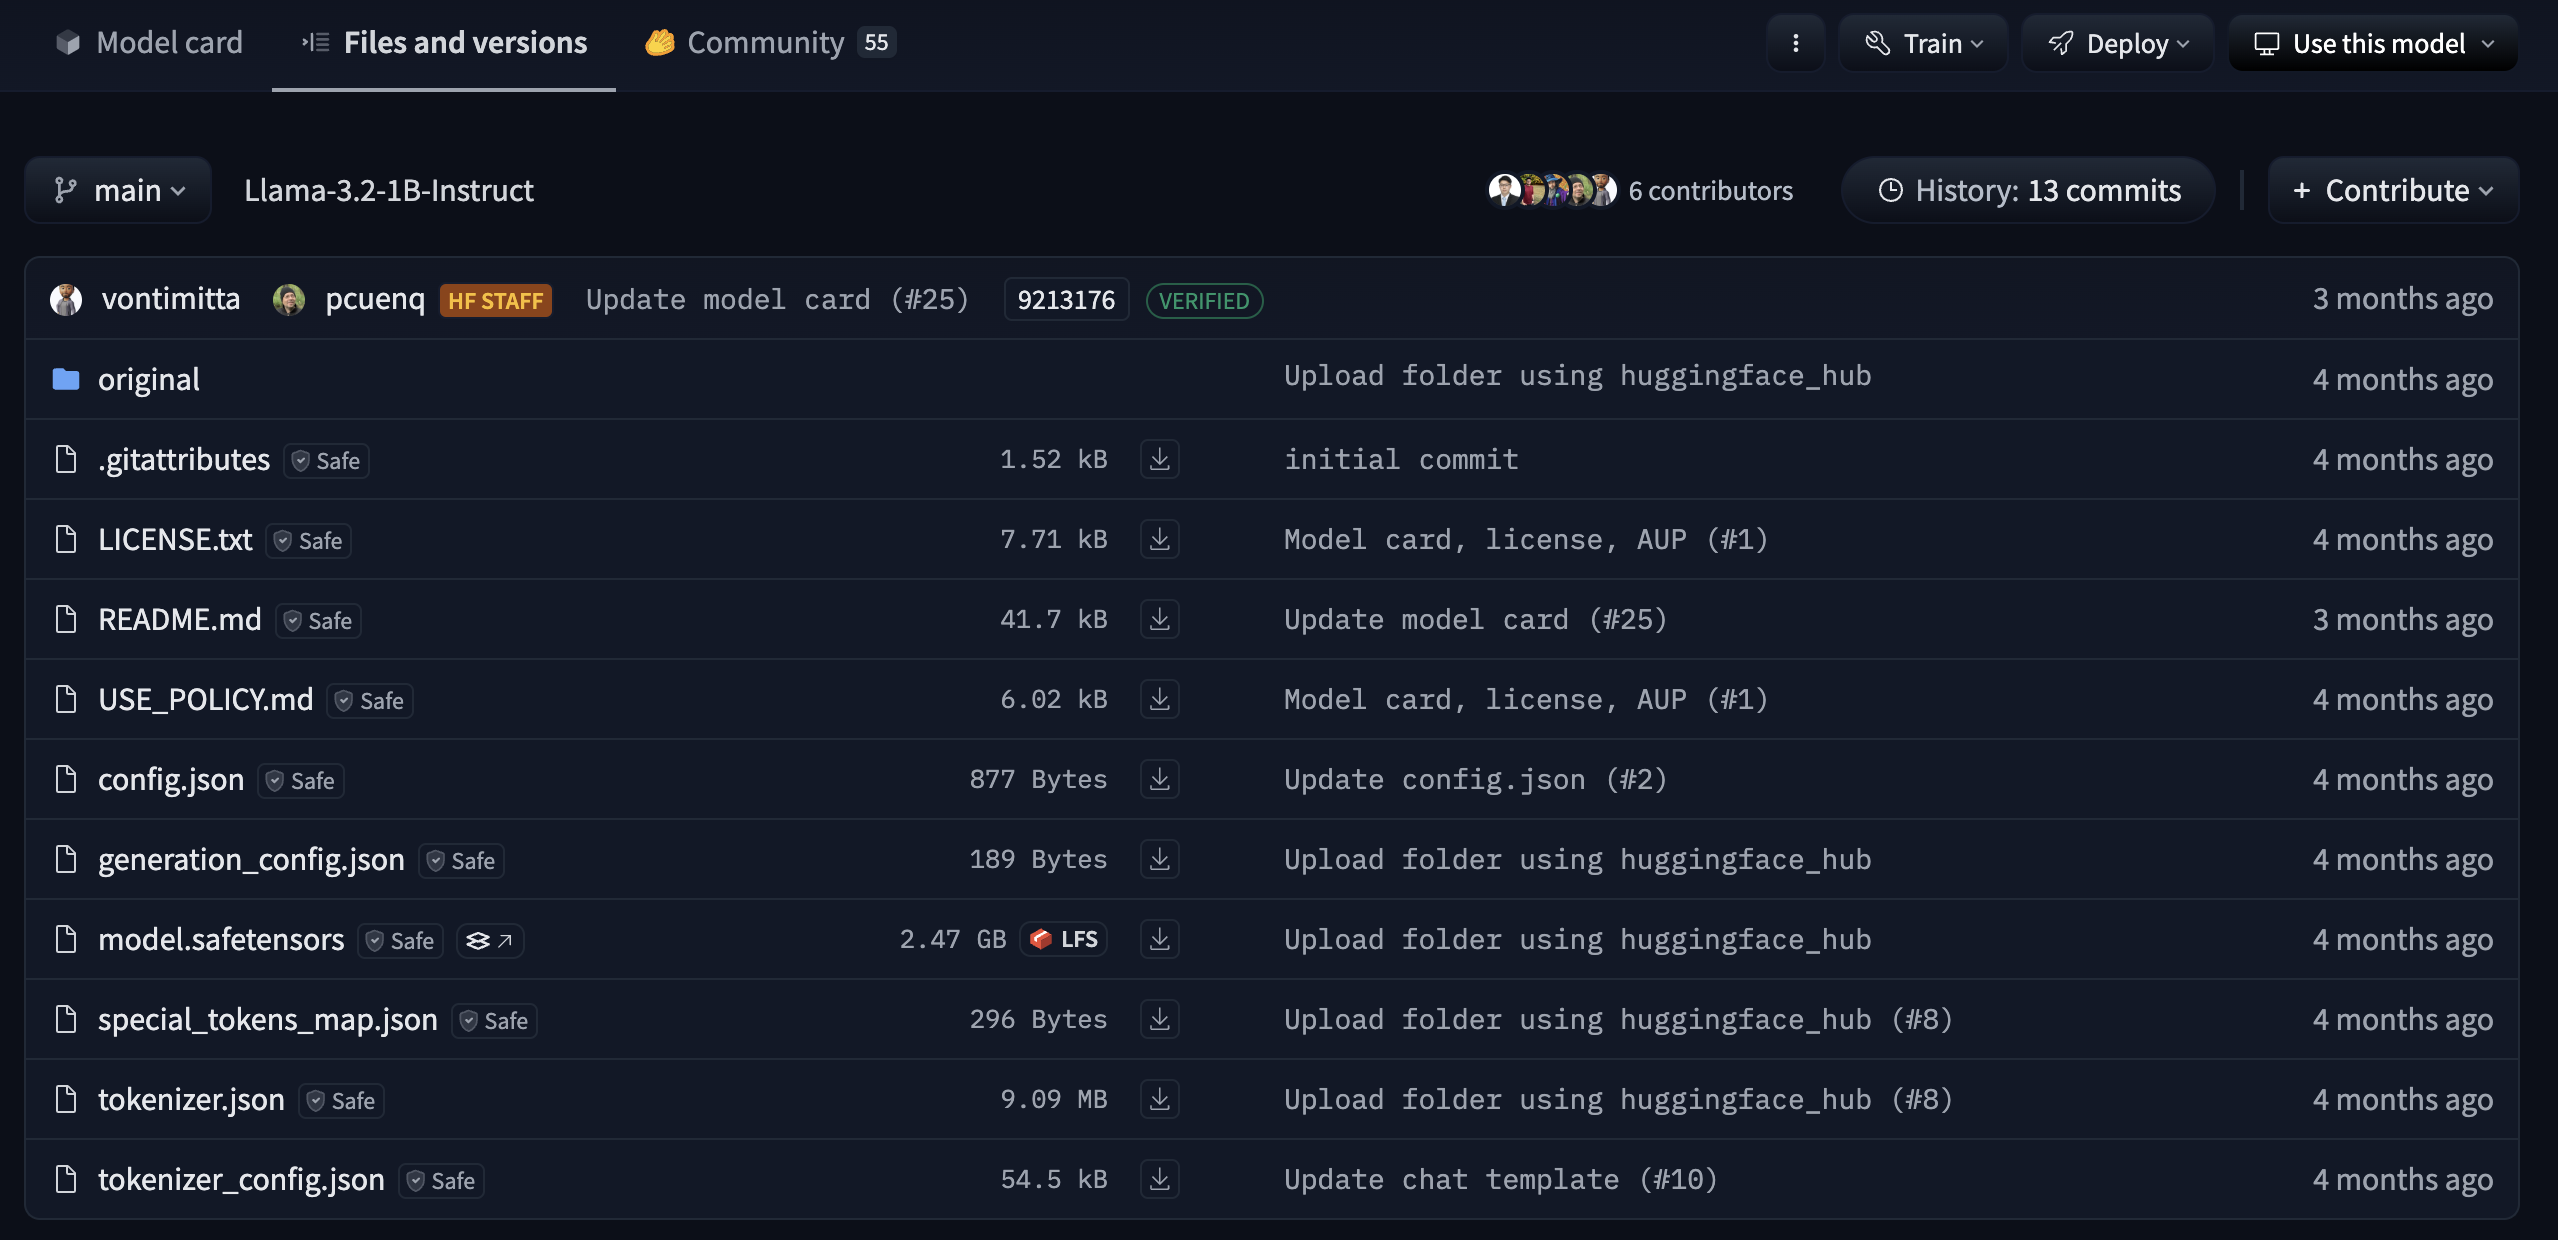

In [16]:
from IPython.display import Image

# Display the image
Image(filename='/kaggle/input/meta-llama/meta llama.png')


### loading models from the local folder
you can load models from the **hugging face model hub** or from **your local file path** (if you want to run this completely local like without using internet) also.

Let's look into each file

#### The Model Files
These files define the neural network structure and store the pre-trained weights.

pytorch_model.bin or model.safetensors

Contains the pre-trained weights of the model in binary format.
This file is the largest because it holds all the learned parameters.
Example: ~2 GB (1 Billion Parameters) for smaller models, but can go up to hundreds of GBs for larger models.

In [17]:
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 2048)
    (layers): ModuleList(
      (0-15): 16 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=512, bias=False)
          (v_proj): Linear(in_features=2048, out_features=512, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm):

> ### 1. Configuration (`config.json`)
- **Defines model architecture**: Specifies parameters like the number of layers, attention heads, and hidden size.
- **Guides model initialization**: Used to correctly build the model's structure based on predefined settings.
- **Essential for loading**: Without it, the model would not know how to configure itself or how to process inputs correctly.


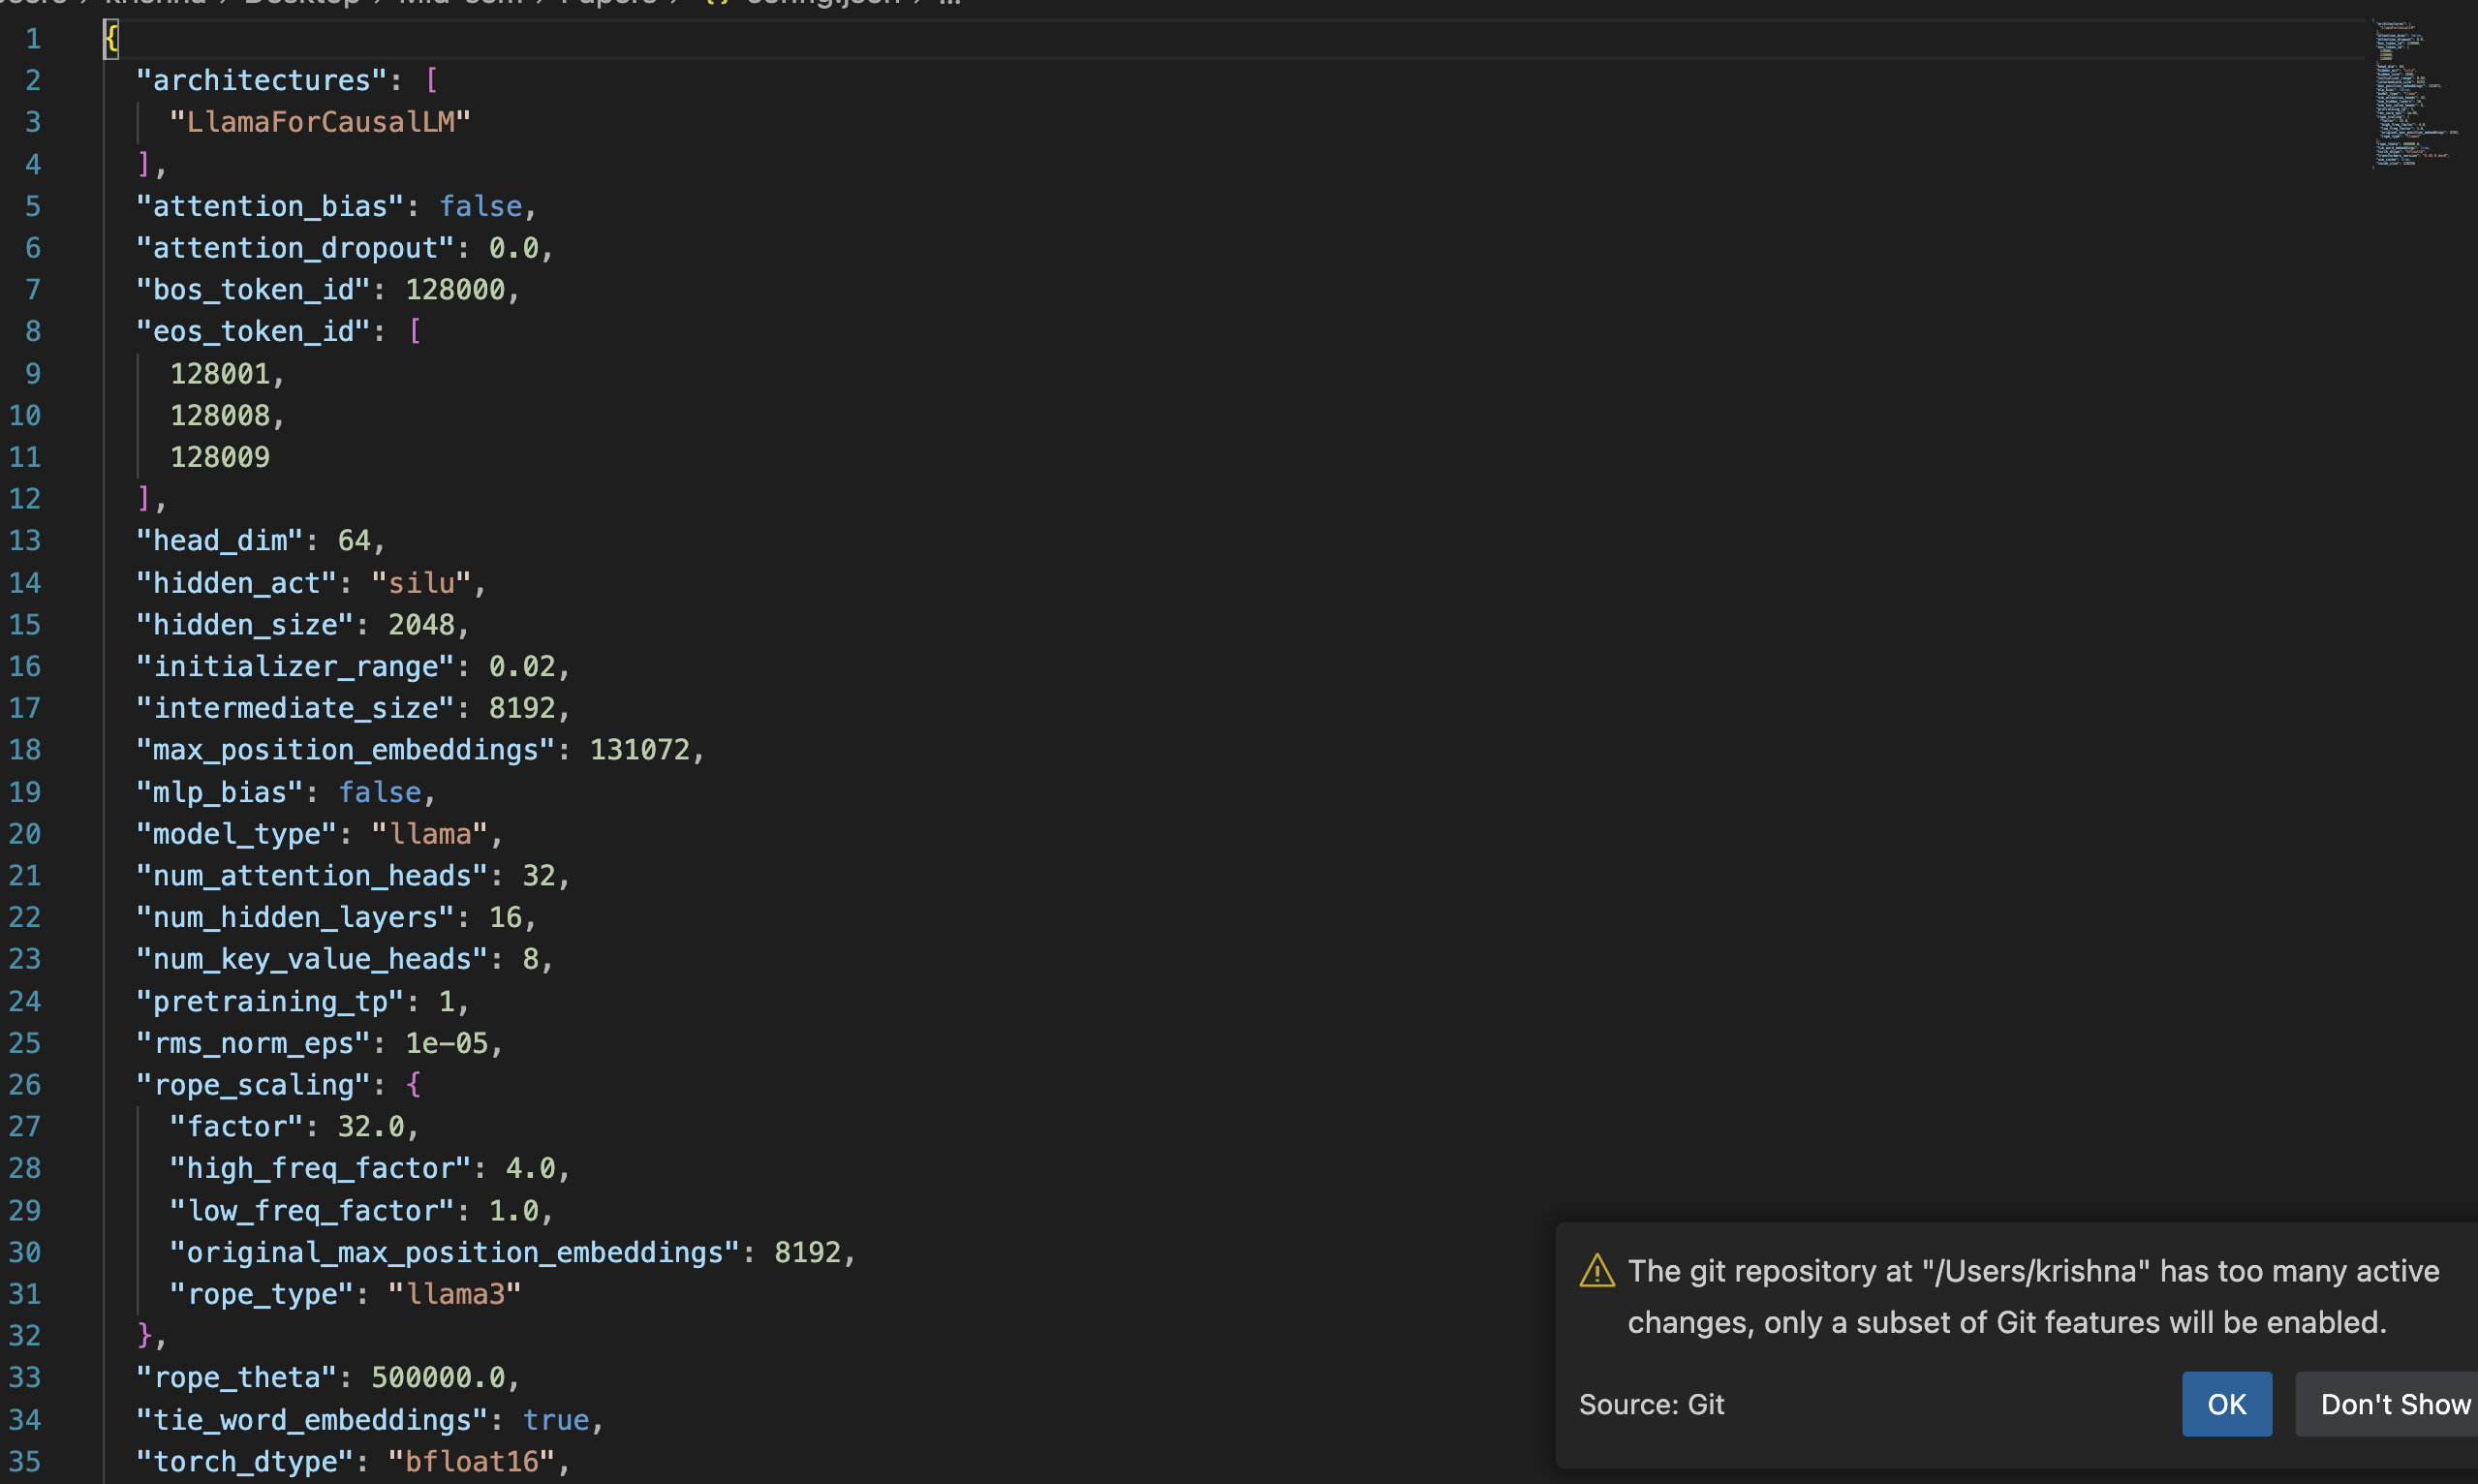

In [18]:
Image(filename='/kaggle/input/llama-model-files/config.png')

### 2. Generation Configuration (`generation_config.json`)
- **Controls text generation settings**: Defines parameters like maximum output length, sampling methods, and temperature for generating text.
- **Tuning generation behavior**: Parameters like `temperature`, `top_k`, and `top_p` control creativity, randomness, and diversity in the model's responses.
- **Used during inference**: This configuration guides how the model generates new text after receiving an input prompt.


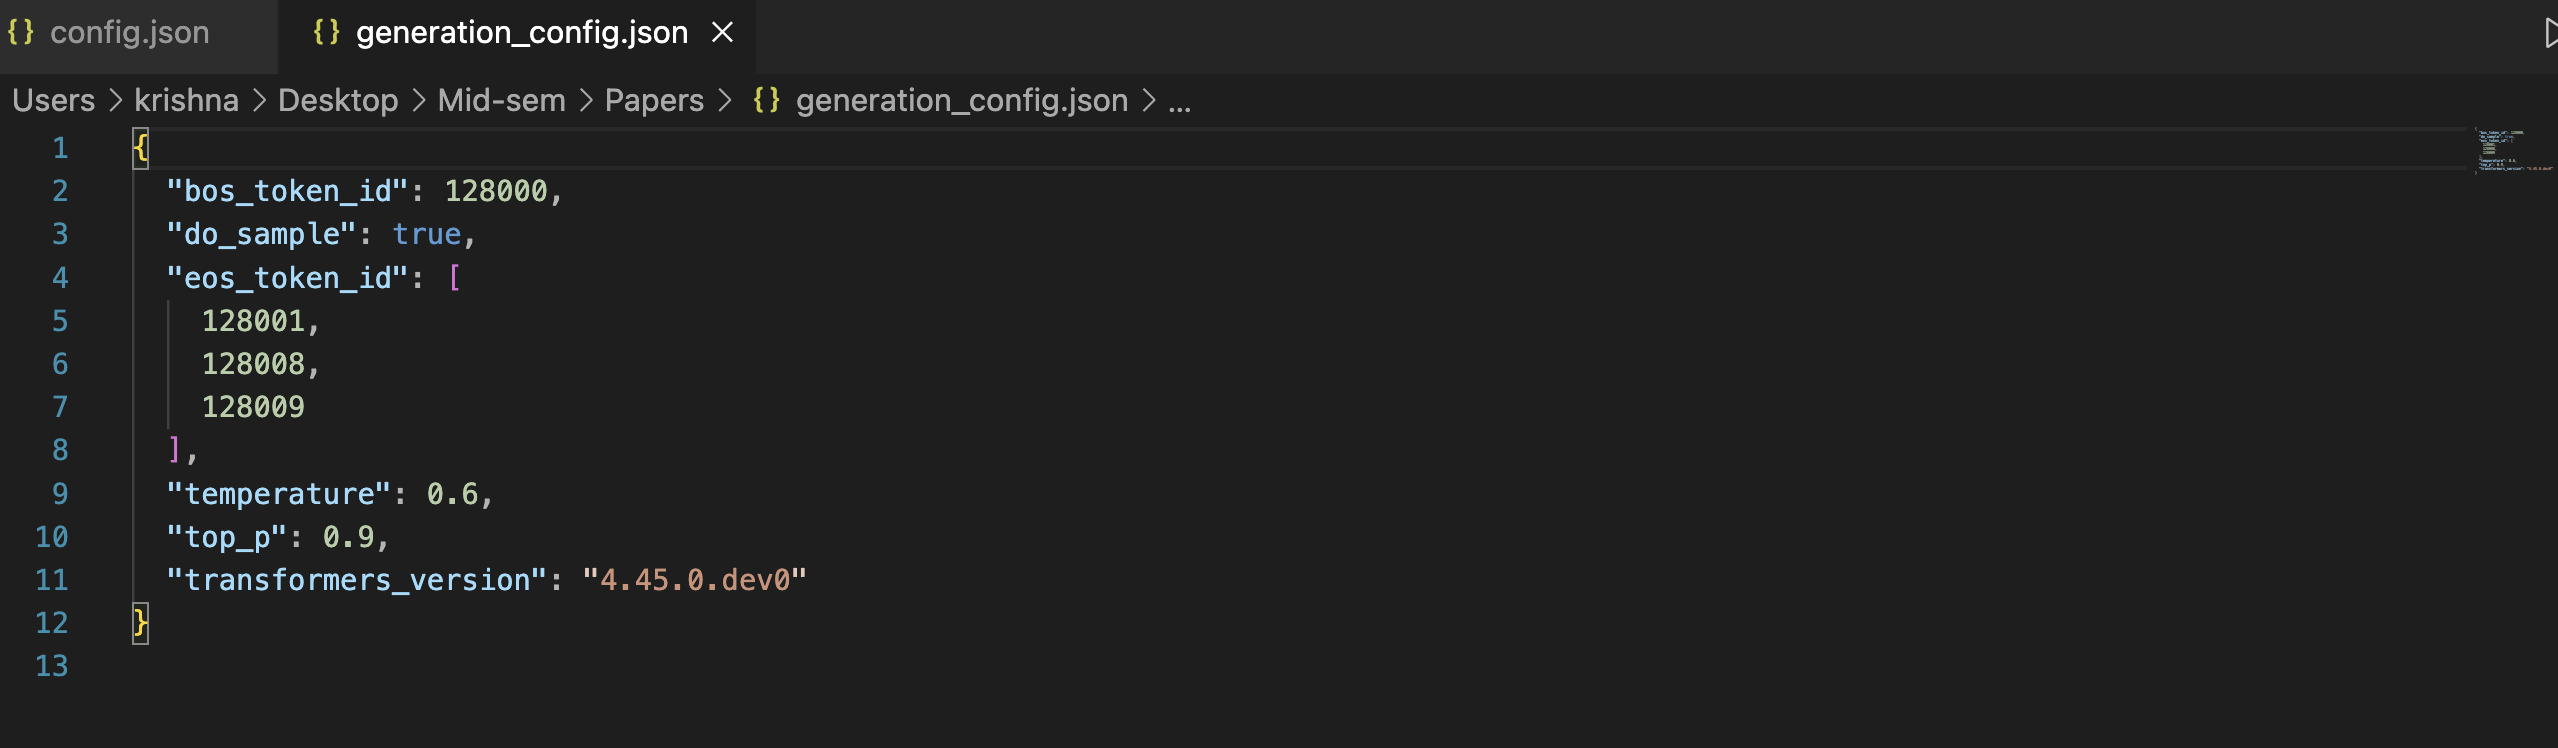

In [20]:
Image(filename='/kaggle/input/llama-model-files/generation_config.png')

### 3. Special Tokens Map (`special_tokens_map.json`)
- **Maps special tokens to IDs**: Defines how special tokens (e.g., `<pad>`, `<bos>`, `<eos>`) are represented in the model’s vocabulary.
- **Guides tokenization and detokenization**: Ensures that special tokens are handled correctly during both text processing and generation.
- **Facilitates model understanding**: Helps the model distinguish between different types of tokens, such as padding, beginning-of-sequence, or end-of-sequence markers.


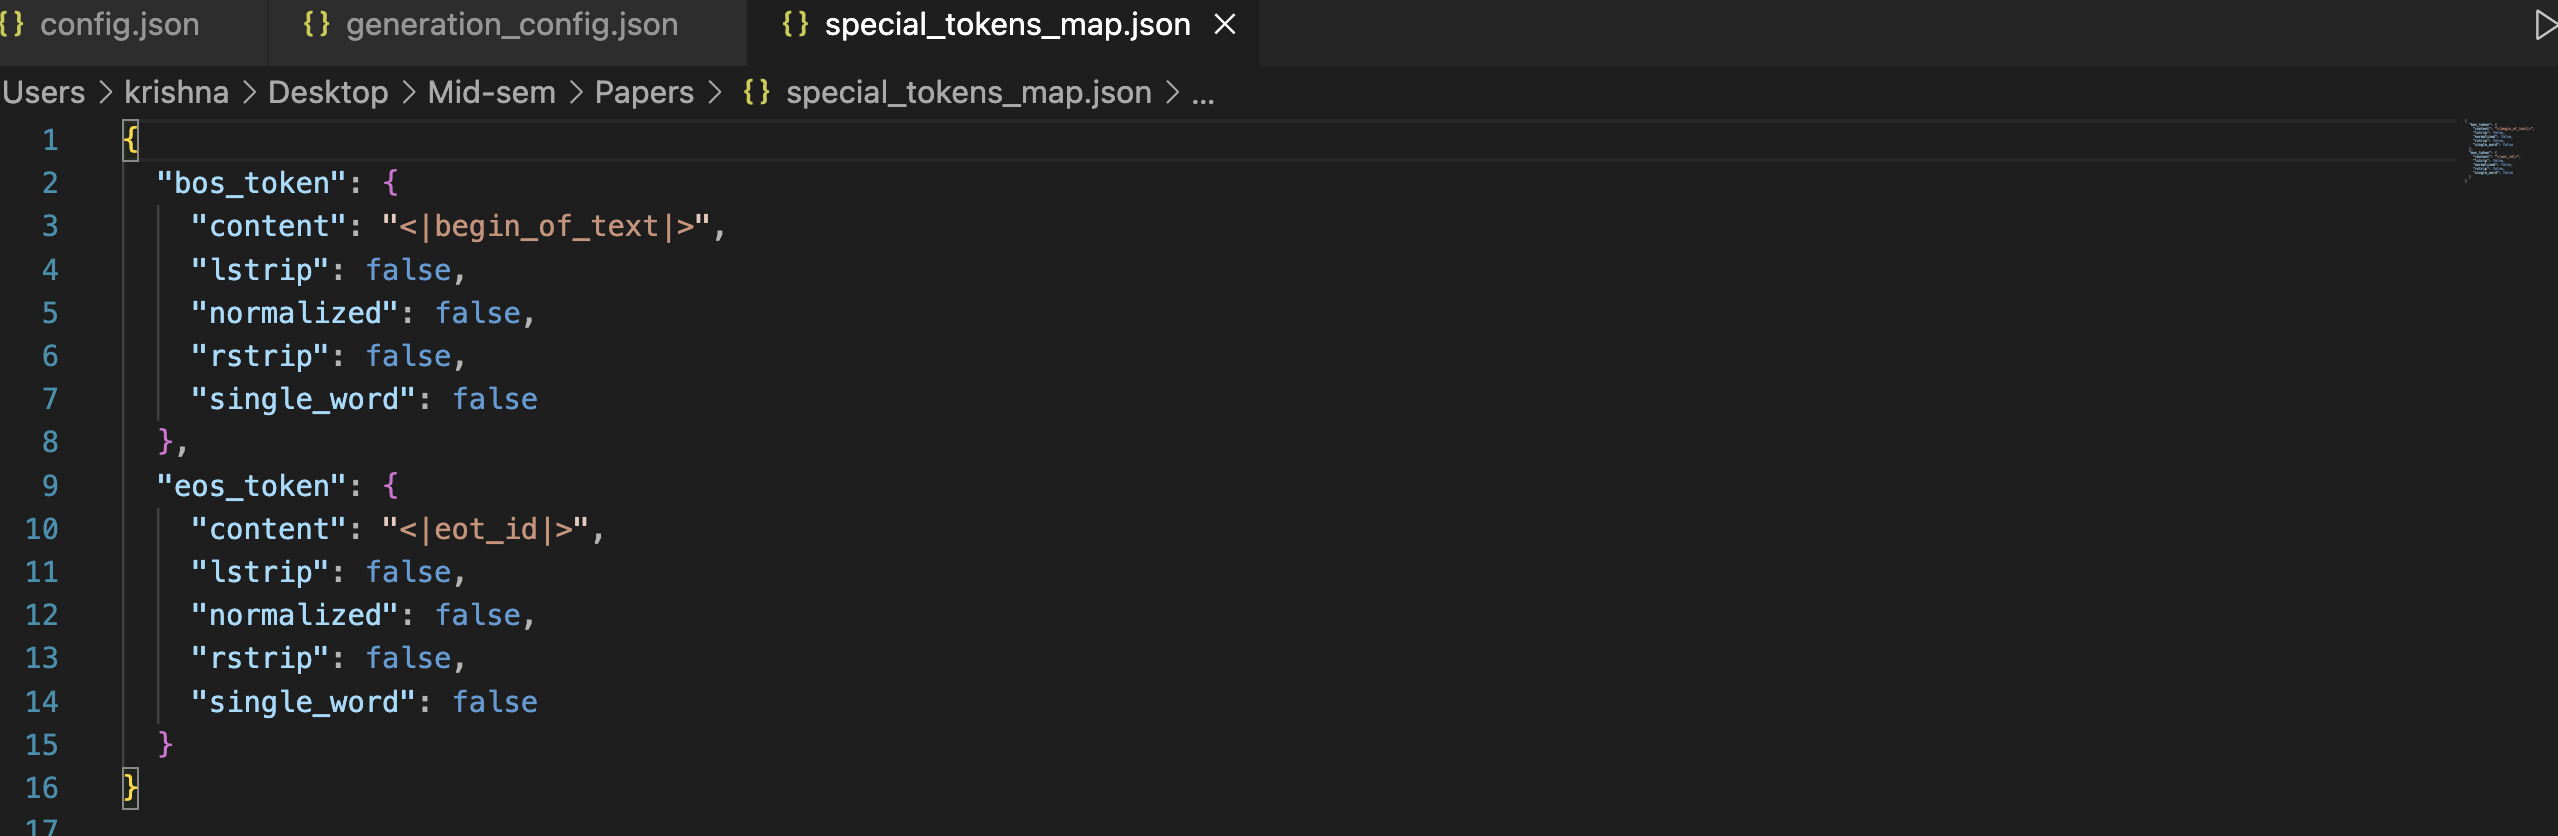

In [21]:
Image(filename='/kaggle/input/llama-model-files/special_tokens_map.png')

### 4. Tokenizer JSON (`tokenizer.json`)
- **Stores tokenizer vocabulary**: Contains the mappings of tokens (e.g., words or subwords) to numerical IDs used by the model.
- **Defines tokenization rules**: Includes information on how input text should be split and encoded into tokens, and how to handle special tokens.
- **Ensures consistency**: The same `tokenizer.json` file must be used during both training and inference to guarantee correct tokenization and detokenization.


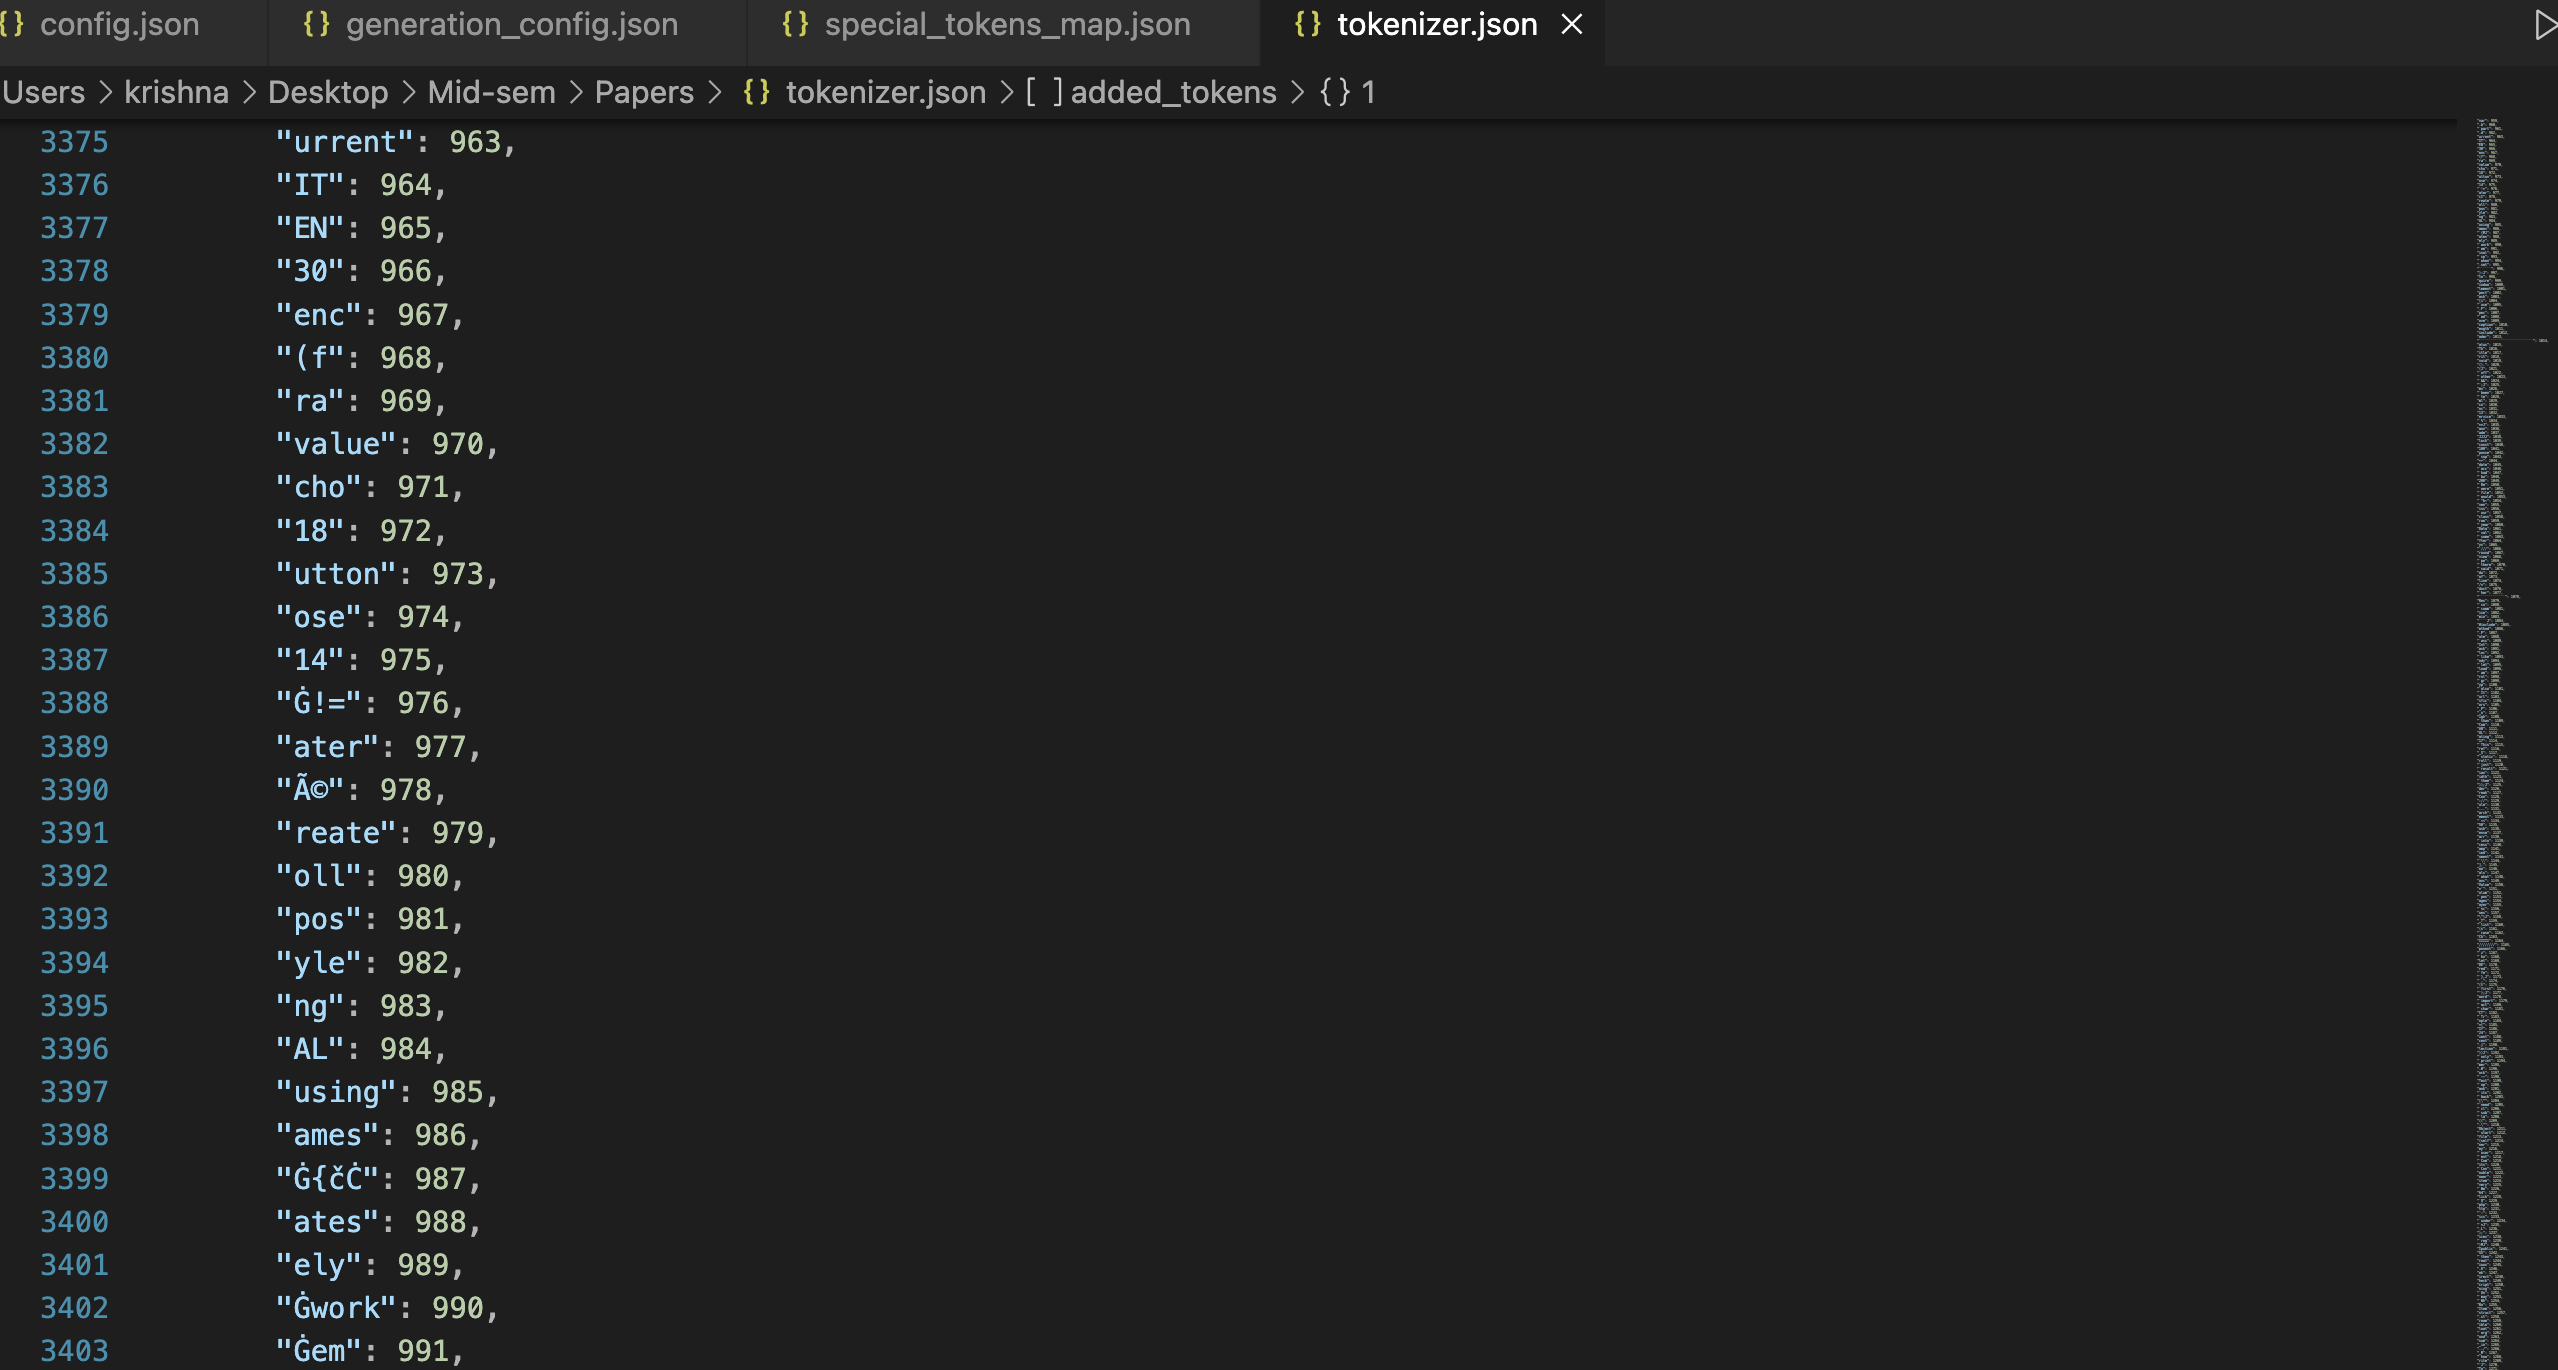

In [25]:
Image(filename='/kaggle/input/llama-model-files/toknizer.png')

### 9. Tokenizer Configuration (`tokenizer_config.json`)
- **Stores tokenizer settings**: Includes parameters such as maximum sequence length, padding behavior, and truncation options.
- **Defines special tokens**: Maps special tokens like `<bos>`, `<eos>`, `<pad>`, and `<unk>` to their respective IDs, ensuring consistent processing.
- **Controls tokenization behavior**: Helps fine-tune how input text is processed, ensuring that tokens are handled appropriately for model inference.


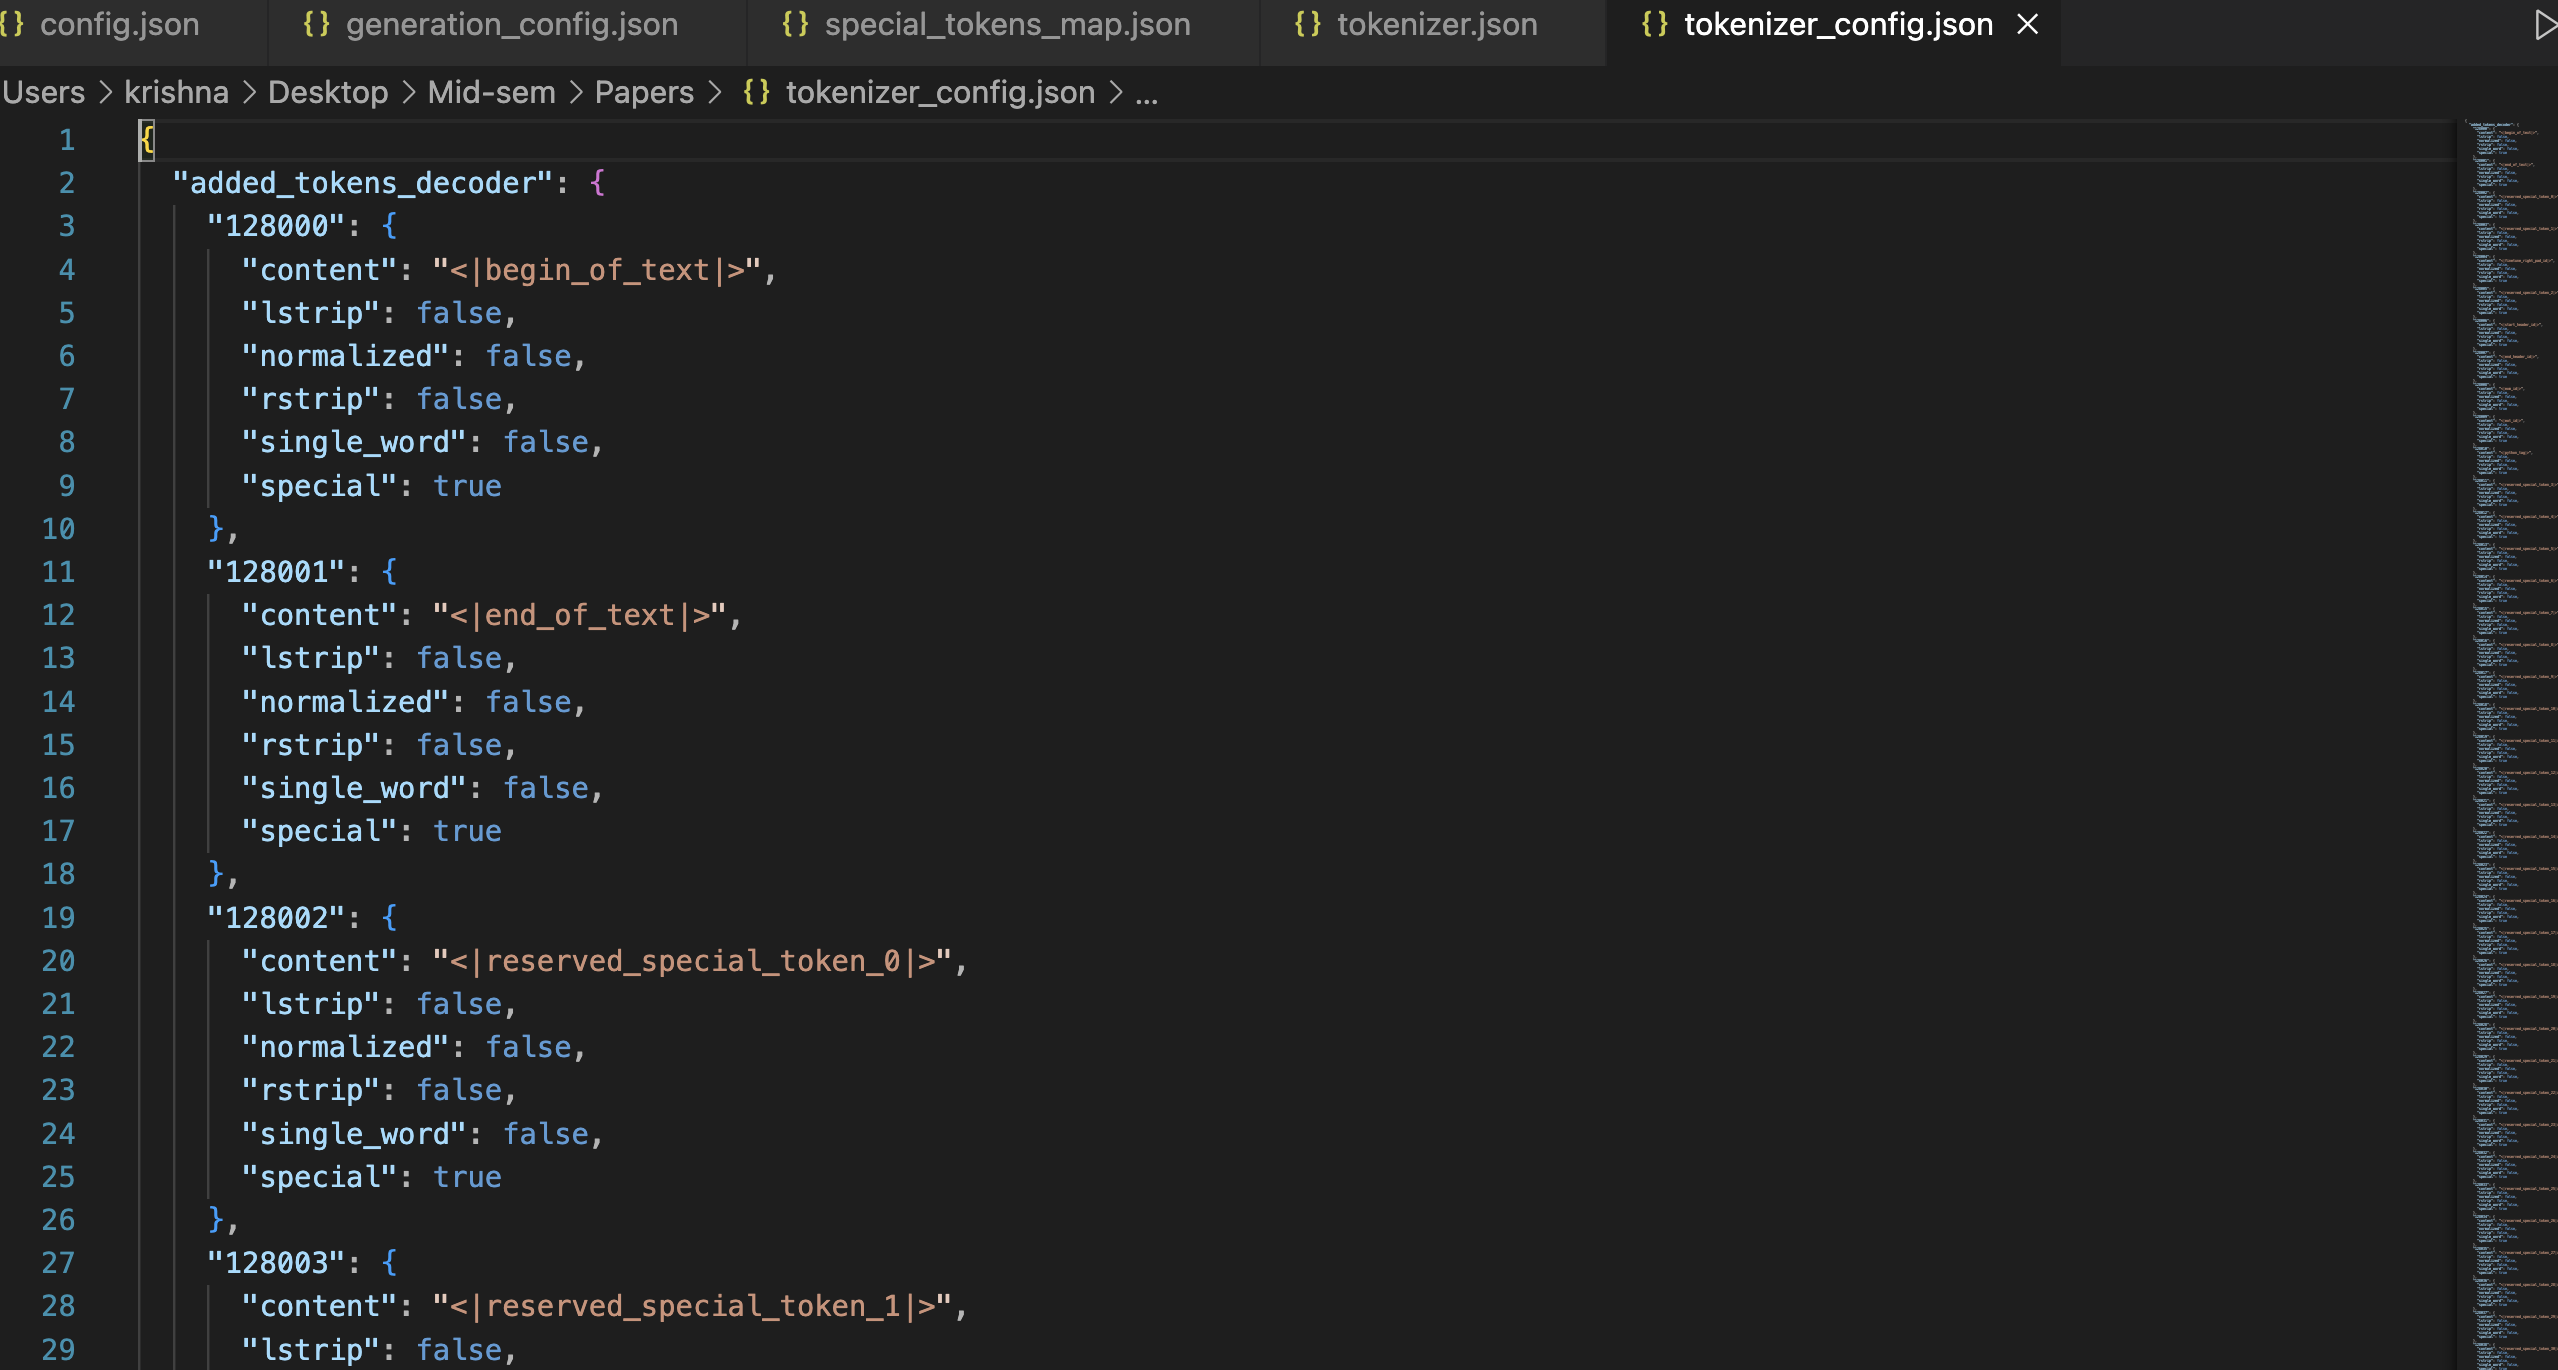

In [26]:
Image(filename='/kaggle/input/llama-model-files/tokenizer_config.png')
